# Linear Regression with Python

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

'Avg. Area Income': Avg. Income of residents of the city house is located in.
'Avg. Area House Age': Avg Age of Houses in same city
'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
'Area Population': Population of city house is located in
'Price': Price that the house sold at
'Address': Address for the house

### Data Aquisition and Clean-up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.shape

(5000, 7)

In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Exploratory Data Analysis

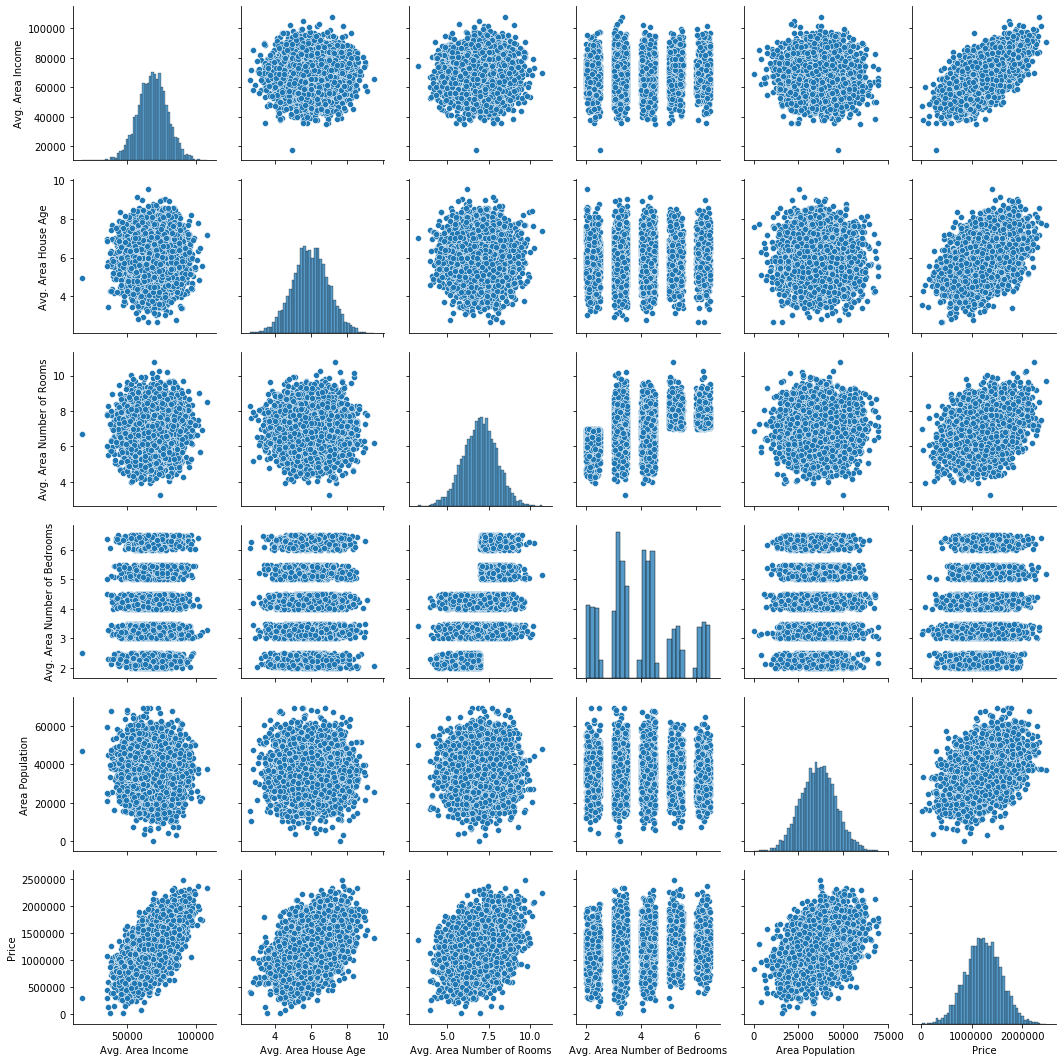

In [8]:
sns.pairplot(df, palette='viridis')

C:\Users\Purushotham\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


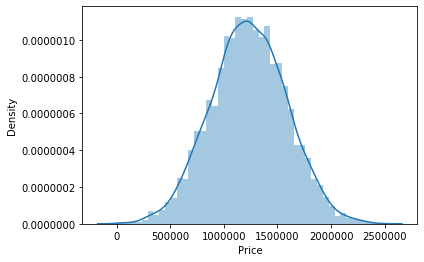

In [9]:
sns.distplot(df['Price'])

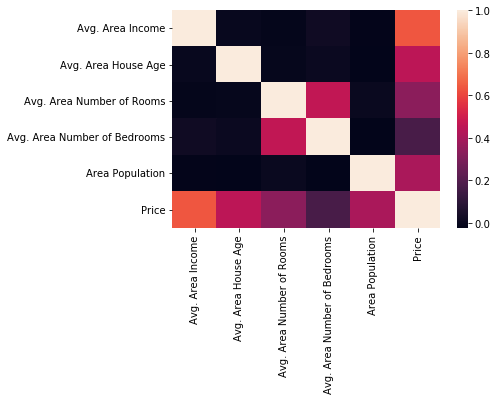

In [10]:
sns.heatmap(df.corr())

### Training the Linear Regression Model

In [12]:
columns = df.columns
columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

##### Setting the target and predictors

In [23]:
# Set the target column
target = 'Price'
y = df[target]


In [36]:
# Get the predictor columns
droplist = [target, 'Address']
predictors = df.drop(droplist, axis=1).columns
X = df[predictors]


In [37]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


##### Splitting the data into training and test data

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [40]:
X_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
4833,61000.160428,6.691542,7.859604,3.47,60697.639241
1218,71172.489061,5.780419,6.102668,4.16,23264.370525
135,74411.059892,5.534628,7.210123,6.44,43537.502946
3612,61685.756042,5.124393,5.604803,3.27,36059.599966
3259,65207.736246,5.997596,8.022923,4.02,29668.101437
...,...,...,...,...,...
4149,76717.097365,5.577625,7.197195,3.11,22276.373067
1890,54447.686052,6.148759,6.077189,2.40,50200.610108
350,81328.807304,6.483153,6.908830,3.01,31231.544403
79,64419.252638,6.954422,8.516160,6.16,39318.170755


In [41]:
y_train

4833    1.739761e+06
1218    8.877394e+05
135     1.393747e+06
3612    7.080456e+05
3259    1.148417e+06
            ...     
4149    1.005392e+06
1890    1.008650e+06
350     1.523136e+06
79      1.492011e+06
3927    1.218566e+06
Name: Price, Length: 4000, dtype: float64

In [42]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
789,62032.959468,5.235211,7.083483,4.39,25267.107607
2507,83896.357966,6.541530,5.258022,4.36,43672.628549
2376,64429.984778,6.436975,7.479371,3.31,39055.822286
1378,57714.752535,4.964760,7.798048,5.40,53100.998908
598,68363.259074,6.306369,6.358629,3.35,20667.902934
...,...,...,...,...,...
1451,73226.200512,6.723350,7.194272,4.03,30464.044037
4921,84040.500241,6.322338,5.275145,2.24,44711.080621
3091,46367.205859,5.290720,5.181614,4.50,26015.296447
3683,74598.431757,5.042876,6.602191,3.30,44568.669687


In [43]:
y_test

789     8.008091e+05
2507    1.620949e+06
2376    1.219637e+06
1378    1.172133e+06
598     8.644838e+05
            ...     
1451    1.316129e+06
4921    1.609092e+06
3091    2.680508e+05
3683    1.399467e+06
235     1.039107e+06
Name: Price, Length: 1000, dtype: float64

##### Build and training the Linear Regression Model

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lm = LinearRegression()

In [50]:
lm.fit(X_train, y_train)

LinearRegression()

In [52]:
lm.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [53]:
lm.intercept_

-2632015.912070278

In [54]:
lm.coef_

array([2.14377564e+01, 1.66072469e+05, 1.20593183e+05, 1.13679220e+03,
       1.53277084e+01])

In [56]:
coeff_df = pd.DataFrame(lm.coef_, predictors, columns=['Coefficients'])
coeff_df

,Coefficients
Avg. Area Income,21.437756
Avg. Area House Age,166072.468652
Avg. Area Number of Rooms,120593.183329
Avg. Area Number of Bedrooms,1136.792202
Area Population,15.327708


##### Testing the model by using the test data for predictions

In [59]:
predictions = lm.predict(X_test)


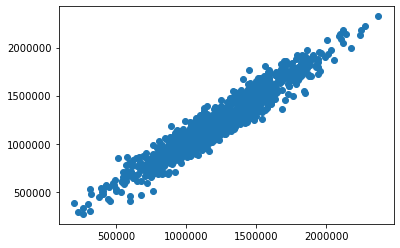

In [60]:
plt.scatter(y_test, predictions)

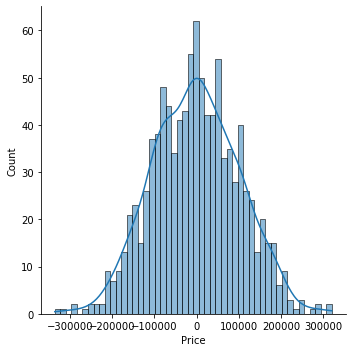

In [69]:
sns.displot((y_test-predictions), bins=50, kde=True)

##### Evaluation metrics

In [70]:
from sklearn import metrics

In [75]:
print('MAE   --> ', metrics.mean_absolute_error(y_test, predictions))
print('MSE   --> ', metrics.mean_squared_error(y_test, predictions))
print('RMSE  --> ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE   -->  81758.9821947698
MSE   -->  10366319820.242859
RMSE  -->  101815.12569477512
